### importing libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing data

In [153]:
train=pd.read_csv("drugLibTrain_raw.tsv",sep="\t")
test=pd.read_csv("drugLibTest_raw.tsv",sep="\t")

In [154]:
train.tail()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...
3106,2748,micardis,4,Moderately Effective,Moderate Side Effects,high blood pressure,The drug Micardis did seem to alleviate my hig...,I find when I am taking Micardis that I tend t...,I take Micardis in pill form once daily.


In [155]:
train.drop('Unnamed: 0',inplace=True,axis=1)
test.drop('Unnamed: 0',inplace=True,axis=1)

In [156]:
train.shape,test.shape

((3107, 8), (1036, 8))

In [157]:
df = pd.concat([train, test], axis=0)

In [158]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [159]:
df.shape

(4143, 8)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 1035
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        4143 non-null   object
 1   rating             4143 non-null   int64 
 2   effectiveness      4143 non-null   object
 3   sideEffects        4143 non-null   object
 4   condition          4142 non-null   object
 5   benefitsReview     4143 non-null   object
 6   sideEffectsReview  4141 non-null   object
 7   commentsReview     4135 non-null   object
dtypes: int64(1), object(7)
memory usage: 291.3+ KB


### checking missing values and found that  missing values are present

In [161]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [162]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

In [163]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [164]:
df['benefitsReview'] = df['benefitsReview'].fillna(df['benefitsReview'].mode()[0])
df['sideEffectsReview']=df['sideEffectsReview'].fillna(df['sideEffectsReview'].mode()[0])

In [165]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       8
dtype: int64

In [166]:
df['condition'].value_counts().head(10)

depression             303
acne                   211
anxiety                 90
insomnia                75
birth control           68
high blood pressure     62
allergies               49
migraine                44
asthma                  41
add                     41
Name: condition, dtype: int64

### Major  drugs

In [167]:
df['urlDrugName'].value_counts()

lexapro       74
paxil         58
retin-a       55
synthroid     53
zoloft        52
              ..
flovent        1
actos          1
cardura        1
tobramycin     1
zebeta         1
Name: urlDrugName, Length: 541, dtype: int64

### looking unique values of important columns

In [168]:
df['urlDrugName'].nunique()

541

In [169]:
df['condition'].nunique()

1807

In [170]:
df['sideEffects'].value_counts()

Mild Side Effects                1349
No Side Effects                  1198
Moderate Side Effects             850
Severe Side Effects               491
Extremely Severe Side Effects     255
Name: sideEffects, dtype: int64

### Data visualization

In [171]:
value=df['sideEffects'].value_counts()
# sizes=value[:10]
series=pd.DataFrame(value)
#series['sideEffects']=series.index
series.rename(columns={'sideEffects': 'Frequency'},inplace=True)
series

,Frequency
Mild Side Effects,1349
No Side Effects,1198
Moderate Side Effects,850
Severe Side Effects,491
Extremely Severe Side Effects,255


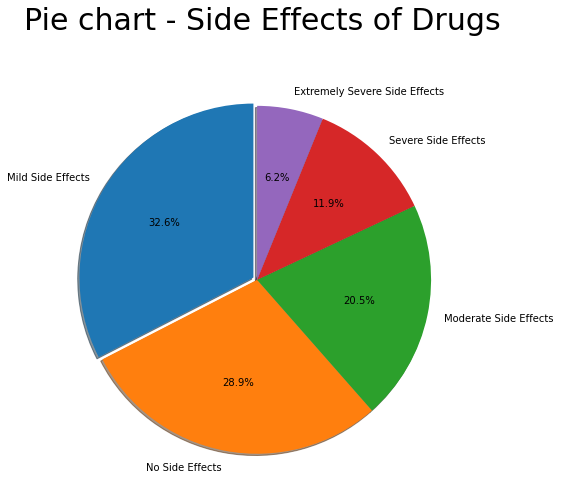

In [172]:
explode = (0.05,0,0,0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(series['Frequency'], labels=series.index,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=2)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Pie chart - Side Effects of Drugs', x=0.525, y=1.45, ha='center', fontsize=30)
# plt.title( "Side Effects of Drugs" , size = 5 ) 
plt.show()

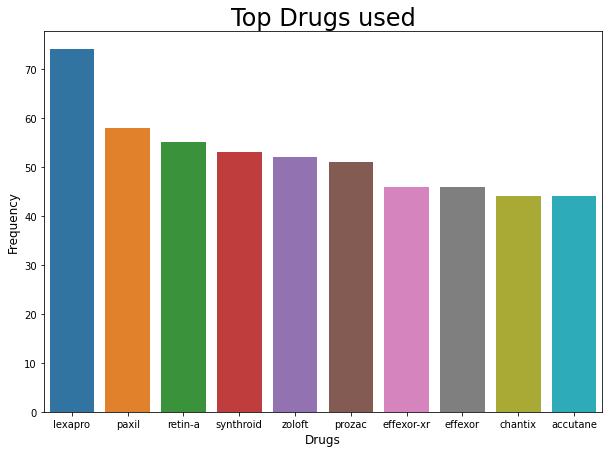

In [173]:
val=df['urlDrugName'].value_counts().head(10)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'urlDrugName': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(10,7))
# Set label for x-axis 
ax.set_xlabel( "Drugs" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Top Drugs used" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

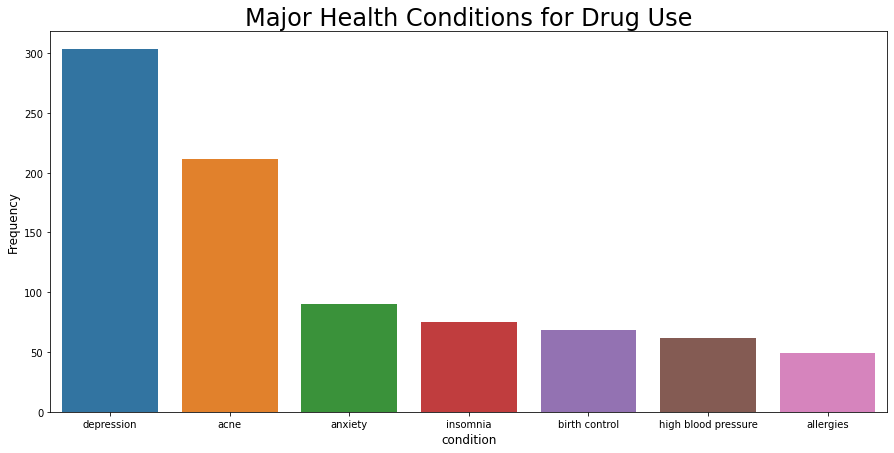

In [174]:
val=df['condition'].value_counts().head(7)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'condition': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
# Set label for x-axis 
ax.set_xlabel( "condition" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Major Health Conditions for Drug Use" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

Text(0, 0.5, 'Frequency')

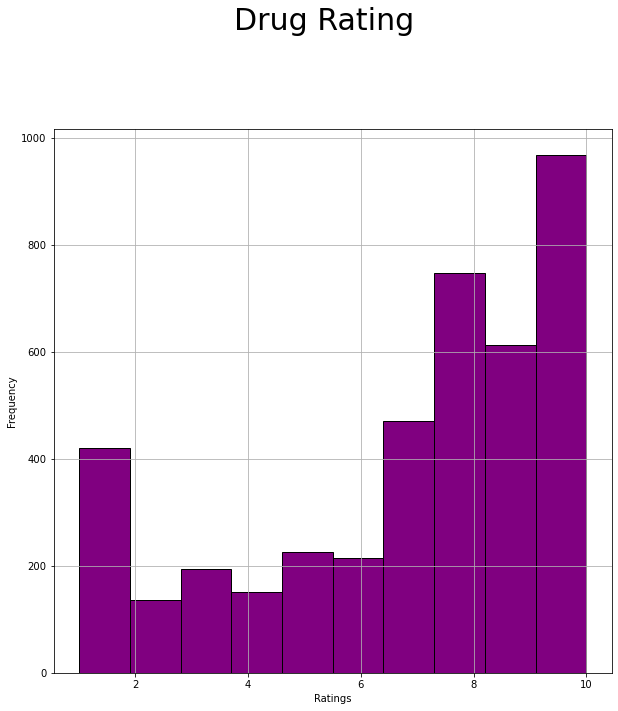

In [175]:
plt.figure(figsize=(10,10))
df['rating'].hist(bins=10,ec='k',color='purple', edgecolor='black')
# plt.title('Drug Rating',size=10)
plt.suptitle('Drug Rating', x=0.5, y=1.05, ha='center', fontsize=30)
plt.xlabel("Ratings")
plt.ylabel("Frequency")

### label encoding all columns with mapping

In [176]:
cols=['urlDrugName','effectiveness','condition','sideEffects']

In [177]:
from sklearn.preprocessing import LabelEncoder
mappings=list()
labelencoder=LabelEncoder()
for x in cols:
    df[x]=labelencoder.fit_transform(df[x])
    mappings_dict={index:label for index, label in enumerate(labelencoder.classes_)}
    mappings.append(mappings_dict)

In [178]:
mappings

[{0: 'abilify',
  1: 'acanya',
  2: 'accolate',
  3: 'accupril',
  4: 'accutane',
  5: 'aciphex',
  6: 'actiq',
  7: 'actonel',
  8: 'actos',
  9: 'acyclovir',
  10: 'aczone',
  11: 'adcirca',
  12: 'adderall',
  13: 'adderall-xr',
  14: 'adipex-p',
  15: 'advair-diskus',
  16: 'advair-hfa',
  17: 'albuterol',
  18: 'aldactone',
  19: 'aldara',
  20: 'alendronate',
  21: 'alesse',
  22: 'allegra',
  23: 'allegra-d',
  24: 'aloprim',
  25: 'alprazolam',
  26: 'ambien',
  27: 'ambien-cr',
  28: 'amerge',
  29: 'amitiza',
  30: 'amoxil',
  31: 'amphetamine',
  32: 'ampicillin',
  33: 'anafranil',
  34: 'androgel',
  35: 'angeliq',
  36: 'antivert',
  37: 'aralen',
  38: 'arava',
  39: 'aricept',
  40: 'arimidex',
  41: 'armour-thyroid',
  42: 'aromasin',
  43: 'arthrotec',
  44: 'asacol',
  45: 'asmanex',
  46: 'atacand',
  47: 'atarax',
  48: 'atenolol',
  49: 'ativan',
  50: 'atripla',
  51: 'augmentin',
  52: 'avage',
  53: 'avapro',
  54: 'avelox',
  55: 'avita',
  56: 'avodart',
  57

### Checking Correlation

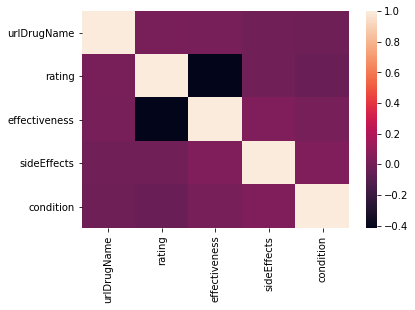

In [179]:
corr=df.corr()
sns.heatmap(corr)

In [180]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

### Selecting Dependent and independent values

In [181]:
x=df.drop(['sideEffects','benefitsReview', 'sideEffectsReview', 'commentsReview'],axis=1)
y=df['sideEffects']

### Standard scaling the data

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [189]:
X_train=x[:3107]
X_test=x[3107:]
y_train=y[:3107]
y_test=y[3107:]

In [190]:
# dtale.show(x)

## Data modeling

In [191]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Logistic regression

In [192]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.62      0.39      0.48        80
           1       0.43      0.55      0.48       330
           2       0.46      0.27      0.34       236
           3       0.51      0.57      0.54       268
           4       0.39      0.42      0.40       122

    accuracy                           0.46      1036
   macro avg       0.48      0.44      0.45      1036
weighted avg       0.47      0.46      0.46      1036



### Gussian Naive Bayes Classifier

In [194]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [195]:
y_pred=classifier.predict(X_test)
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.52      0.64      0.57        80
           1       0.46      0.52      0.49       330
           2       0.40      0.29      0.34       236
           3       0.53      0.54      0.53       268
           4       0.34      0.33      0.33       122

    accuracy                           0.46      1036
   macro avg       0.45      0.46      0.45      1036
weighted avg       0.45      0.46      0.45      1036



**Bernouli Naive Bayes Classifier**

In [196]:
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.43      0.67      0.53       330
           2       0.35      0.17      0.22       236
           3       0.42      0.24      0.31       268
           4       0.25      0.51      0.33       122

    accuracy                           0.37      1036
   macro avg       0.29      0.32      0.28      1036
weighted avg       0.35      0.37      0.34      1036



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

**Linear SVM**

In [210]:
classifier=SVC(kernel="linear",random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.42      0.52      0.47       330
           2       0.45      0.22      0.29       236
           3       0.49      0.57      0.53       268
           4       0.35      0.61      0.44       122

    accuracy                           0.43      1036
   macro avg       0.34      0.38      0.35      1036
weighted avg       0.41      0.43      0.40      1036



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**POLYNOMIAL SVM**

In [217]:
svm_po=SVC(kernel='poly',degree=3,random_state=123)
svm_po.fit(X_train,y_train)
y_pred=svm_po.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.59      0.46      0.52        80
           1       0.40      0.72      0.52       330
           2       0.44      0.22      0.29       236
           3       0.50      0.33      0.40       268
           4       0.41      0.31      0.36       122

    accuracy                           0.44      1036
   macro avg       0.47      0.41      0.42      1036
weighted avg       0.45      0.44      0.42      1036



**Radial SVM**

In [212]:
svm_ra=SVC(kernel='rbf',random_state=123)
svm_ra.fit(X_train,y_train)
y_pred=svm_ra.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.57      0.35      0.43        80
           1       0.45      0.62      0.52       330
           2       0.45      0.30      0.36       236
           3       0.59      0.54      0.57       268
           4       0.37      0.42      0.39       122

    accuracy                           0.48      1036
   macro avg       0.49      0.44      0.45      1036
weighted avg       0.49      0.48      0.47      1036



**KNN algorithm**

In [197]:
acc_values=[]
neighbors=np.arange(1,16)
for i in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

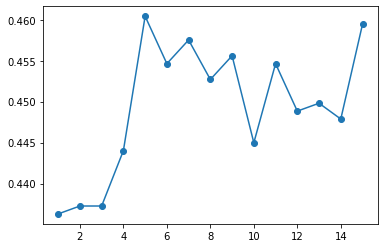

In [198]:
plt.plot(range(1,16),acc_values,'-o')
plt.show()

In [199]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report\n",classification_report(y_test,y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.47      0.50      0.48        80
           1       0.45      0.59      0.51       330
           2       0.39      0.30      0.34       236
           3       0.59      0.52      0.56       268
           4       0.33      0.25      0.29       122

    accuracy                           0.46      1036
   macro avg       0.45      0.43      0.43      1036
weighted avg       0.46      0.46      0.45      1036



**Decision Tree**

In [200]:
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification report: \n",classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.46      0.50        80
           1       0.44      0.44      0.44       330
           2       0.38      0.36      0.37       236
           3       0.49      0.51      0.50       268
           4       0.32      0.35      0.33       122

    accuracy                           0.43      1036
   macro avg       0.43      0.43      0.43      1036
weighted avg       0.43      0.43      0.43      1036



In [201]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=123,min_samples_split=30,max_depth=300)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification matrix: \n",classification_report(y_test,y_pred))

Classification matrix: 
               precision    recall  f1-score   support

           0       0.55      0.68      0.60        80
           1       0.46      0.50      0.48       330
           2       0.43      0.34      0.38       236
           3       0.53      0.57      0.55       268
           4       0.41      0.34      0.37       122

    accuracy                           0.47      1036
   macro avg       0.47      0.48      0.47      1036
weighted avg       0.47      0.47      0.47      1036



**Random forest Classifier**

In [202]:
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        80
           1       0.48      0.47      0.47       330
           2       0.38      0.37      0.38       236
           3       0.56      0.58      0.57       268
           4       0.34      0.39      0.36       122

    accuracy                           0.47      1036
   macro avg       0.47      0.46      0.46      1036
weighted avg       0.47      0.47      0.47      1036



### **Gradient Boosting**

In [203]:
classifier=GradientBoostingClassifier(random_state=123,n_estimators =58,min_samples_split=0.07)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        80
           1       0.52      0.62      0.56       330
           2       0.49      0.42      0.45       236
           3       0.65      0.59      0.62       268
           4       0.36      0.34      0.35       122

    accuracy                           0.53      1036
   macro avg       0.51      0.50      0.50      1036
weighted avg       0.53      0.53      0.53      1036



### Evaluating using kFold Crossvalidation

In [204]:
seed = 123
num_trees = 58

In [205]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=7, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed,min_samples_split=0.07)
results = model_selection.cross_val_score(model, x, y, cv=kfold)

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [206]:
print(results.mean())

0.515090416740163


**Xg Boost**

In [207]:
xgbc=XGBClassifier(random_state=123)
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

C:\Users\Vinay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 
               precision    recall  f1-score   support

           0       0.57      0.46      0.51        80
           1       0.51      0.52      0.51       330
           2       0.43      0.43      0.43       236
           3       0.58      0.57      0.57       268
           4       0.33      0.36      0.34       122

    accuracy                           0.49      1036
   macro avg       0.48      0.47      0.47      1036
weighted avg       0.49      0.49      0.49      1036



### Extra Tree Classifier

In [208]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100,max_features=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.53      0.49      0.51        80
           1       0.48      0.50      0.49       330
           2       0.37      0.34      0.35       236
           3       0.57      0.58      0.58       268
           4       0.31      0.34      0.32       122

    accuracy                           0.46      1036
   macro avg       0.45      0.45      0.45      1036
weighted avg       0.46      0.46      0.46      1036



### AdaBoost Classifier

In [209]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.49      0.44      0.46        80
           1       0.47      0.61      0.53       330
           2       0.48      0.46      0.47       236
           3       0.56      0.42      0.48       268
           4       0.32      0.29      0.30       122

    accuracy                           0.47      1036
   macro avg       0.46      0.44      0.45      1036
weighted avg       0.48      0.47      0.47      1036



## Model splitting and parameter tuning -- Gradient Search CV

In [232]:
model_params={
     'Gradient': {
         'model':GradientBoostingClassifier(),
         'params':{
             'n_estimators':[58,60,57,59,56,54,52,62],
             'min_samples_split':[0.07,0.08,0.09,0.06,0.05]
          }
     },
     'svm_rad': {
        'model':SVC(kernel='rbf'),
        'params':{
            'C':[1,2,3,4,5,10,20],
            'gamma' : [1,2,3,4,5,6,7,8,9]
         }
        
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'xg':{
         'model':XGBClassifier(),
         'params':{
             'n_estimators':[0,1,2,3,4],
         }
     },
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'min_samples_split':[10,20,30,31,29,35,40],
            'max_depth':[200,300,310,290,250,350]
        }
    }
}

In [233]:
from sklearn.model_selection import GridSearchCV

scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(x,y)
    scores.append({
    'model':model_name,
    'best_score':clf.best_score_,
    'best_params':clf.best_params_
})


C:\Users\Vinay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [234]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Gradient,0.514844,"{'min_samples_split': 0.05, 'n_estimators': 56}"
1,svm_rad,0.482742,"{'C': 1, 'gamma': 1}"
2,random_forest,0.461019,{'n_estimators': 10}
3,xg,0.513396,{'n_estimators': 4}
4,DecisionTree,0.481776,"{'criterion': 'entropy', 'max_depth': 300, 'mi..."


In [238]:
#  clf.best_estimator_

In [239]:
#  clf.best_params_

### fitting by best estimator with best parameters

In [240]:
classifier=GradientBoostingClassifier(random_state=123,n_estimators =56,min_samples_split=0.05)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.56      0.54      0.55        80
           1       0.51      0.62      0.56       330
           2       0.50      0.43      0.46       236
           3       0.66      0.59      0.62       268
           4       0.36      0.34      0.35       122

    accuracy                           0.53      1036
   macro avg       0.52      0.50      0.51      1036
weighted avg       0.53      0.53      0.53      1036



## end